<a href="https://colab.research.google.com/github/gauri-vig/Skin-disease-classification/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import kagglehub
import os
from os import listdir
from os.path import isfile, join

# Download dataset
path = kagglehub.dataset_download("pritpal2873/multiple-skin-disease-detection-and-classification")
print("Path to downloaded dataset files:", path)

# Verify dataset structure and construct correct paths
print("Contents of downloaded kagglehub path:", os.listdir(path))
# Correct the directory name based on os.listdir(path) output
dataset_root_path = join(path, 'Skin Cancer Dataset') # Corrected: Removed (Augmented)
print("Contents of dataset_root_path:", os.listdir(dataset_root_path))

# The dataset structure has class folders directly under dataset_root_path, not separate train/valid folders
# We will use ImageDataGenerator's validation_split to create train/validation splits.

# print('Number of classes in train and valid are same:', len(listdir(train_path)) == len(listdir(validation_path)))
# print("Number of classes:", len(listdir(train_path)))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training data, and also setting up the split
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,      # 20% of data will be used for validation
    rotation_range=20,         # random rotation
    zoom_range=0.2,            # random zoom
    width_shift_range=0.1,     # horizontal shift
    height_shift_range=0.1,    # vertical shift
    horizontal_flip=True,      # flip images
    fill_mode='nearest'
)

# Only rescaling for validation data (no augmentation), also setting up the split
val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2       # 20% of data will be used for validation
)

# TRAIN generator
train_data = train_datagen.flow_from_directory(
    dataset_root_path, # Point to the directory containing class folders
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training', # Specify this as the training subset
    shuffle=True
)

# VALIDATION generator
val_data = val_datagen.flow_from_directory(
    dataset_root_path, # Point to the directory containing class folders
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation', # Specify this as the validation subset
    shuffle=False # Usually no shuffle for validation
)

# Class names
class_names = list(train_data.class_indices.keys())

print("Class Names:", class_names)
print("Number of Classes:", len(class_names))

100%|██████████| 785M/785M [00:06<00:00, 126MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/pritpal2873/multiple-skin-disease-detection-and-classification/versions/4
Contents of downloaded kagglehub path: ['Skin Cancer Dataset']
Contents of dataset_root_path: ['Squamous Cell Carcinoma', 'Pigmented Benign Keratosis', 'Basal Cell Carcinoma', 'Dermatofibroma', 'Melanoma', 'Seborrheic Keratosis', 'Nevus', 'Acitinic Keratosis', 'Vascular Lesion']
Found 3288 images belonging to 9 classes.
Found 819 images belonging to 9 classes.
Class Names: ['Acitinic Keratosis', 'Basal Cell Carcinoma', 'Dermatofibroma', 'Melanoma', 'Nevus', 'Pigmented Benign Keratosis', 'Seborrheic Keratosis', 'Squamous Cell Carcinoma', 'Vascular Lesion']
Number of Classes: 9


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reset val_data generator to ensure predictions are made on the entire validation set
val_data.reset()

# Get true labels from the validation data generator
true_labels = val_data.classes

# Predict labels for the validation data
predictions = model.predict(val_data)
predicted_labels = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'model' is not defined

In [ ]:
# Import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=[early_stop, lr_reduce]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.2278 - loss: 2.3283 - val_accuracy: 0.4200 - val_loss: 1.6434 - learning_rate: 0.0010
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.4026 - loss: 1.7020 - val_accuracy: 0.4518 - val_loss: 1.5462 - learning_rate: 0.0010
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.4560 - loss: 1.5314 - val_accuracy: 0.4737 - val_loss: 1.5178 - learning_rate: 0.0010
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.4810 - loss: 1.4670 - val_accuracy: 0.4872 - val_loss: 1.4694 - learning_rate: 0.0010
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.4746 - loss: 1.4654 - val_accuracy: 0.4628 - val_loss: 1.5190 - learning_rate: 0.0010
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 308s 3s/step - accuracy: 0.5174 - loss: 1.3874 - val_accuracy: 0.4762 - val_loss: 1.4925 - learning_rate: 0.0010
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.5042 - loss: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


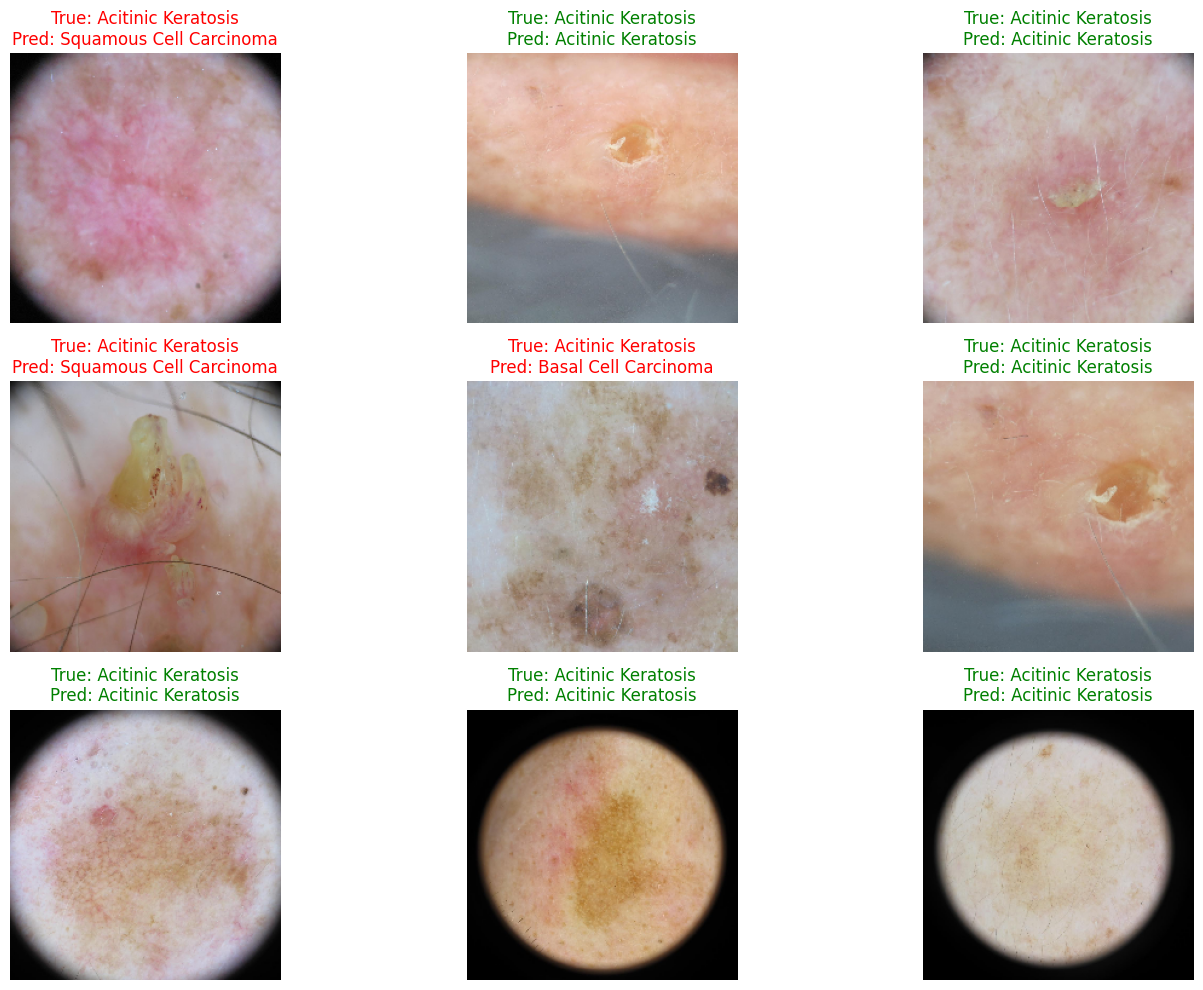

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of validation images and labels
# Ensure val_data is reset if you want a fresh batch from the beginning
# For demonstration, we'll just get one batch
val_images, val_true_labels = next(val_data)

# Make predictions using the trained model
predictions = model.predict(val_images)

# Convert predictions from one-hot encoded to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(val_true_labels, axis=1)

# Display some of the validation images with their predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(9): # Display first 9 images from the batch
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    true_label = class_names[true_classes[i]]
    predicted_label = class_names[predicted_classes[i]]
    color = "green" if true_label == predicted_label else "red"
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()

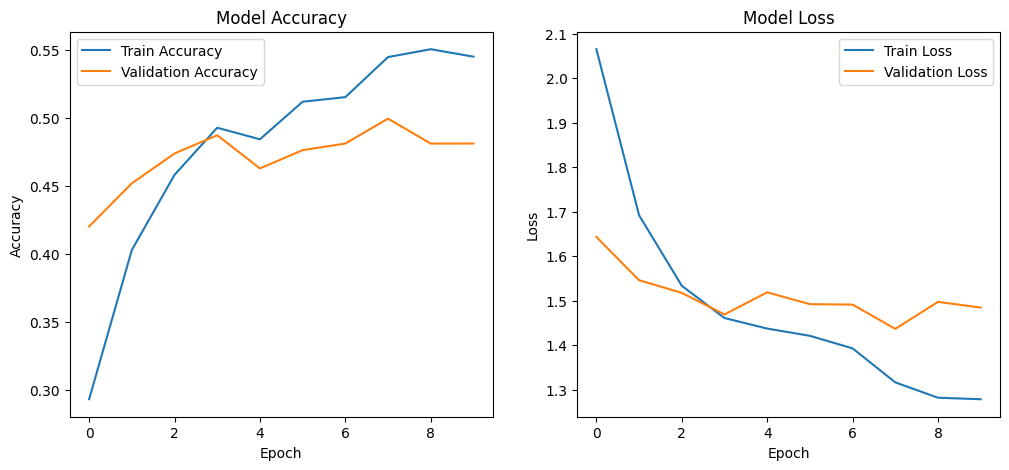

In [ ]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Import necessary layers and models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Load the pre-trained MobileNetV2 model
# include_top=False means we don't include the classifier layers of MobileNetV2
# weights='imagenet' uses weights pre-trained on the ImageNet dataset
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')

# Freeze the base model layers so they are not updated during the initial training phase
base_model.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x) # This layer converts the feature maps to a single vector per image
x = Dropout(0.3)(x)             # Add dropout for regularization to prevent overfitting
output = Dense(len(class_names), activation='softmax')(x) # Output layer with one neuron per class and softmax activation

# Create the new model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
# Optimizer: 'adam' is a good general-purpose optimizer
# Loss: 'categorical_crossentropy' is suitable for multi-class classification with one-hot encoded labels
# Metrics: 'accuracy' to monitor classification performance
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary to see the architecture and number of parameters
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,269,513 (8.66 MB)

 Trainable params: 11,529 (45.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)